In [2]:
from collections import defaultdict

In [3]:
def is_valid_line(line):
    # Split the line by spaces and check if it contains exactly three elements
    elements = line.strip().split()
    if len(elements) != 3:
        return False
    
    # Check if each element is a valid integer
    for element in elements:
        if not element.isdigit():
            return False
    
    return True
    
class CoxeterDiagram:

    def __init__(self):
        print("Created empty Coxeter diagram.")
        self.coxiter_file_path = ""
        self.coxiter_data = []
        self.graph_loopless = Graph()
        self.graph = Graph(loops=True)
        self.vertex_positions = {}
        self.matrix = []
        self.subgraphs = []

    def init_from_tuples(self, tuples):
        self.coxiter_data = tuples
        self.build_graph()
        self.matrix = self.graph.weighted_adjacency_matrix()

        
    def init_from_coxiter_file(self, coxiter_file_path):
        self.coxiter_file_path = coxiter_file_path
        filename = self.coxiter_file_path
        valid_lines = []
        try:
            with open(filename, 'r') as file:
                for line in file:
                    if is_valid_line(line):
                        vertex_edge_tuple = tuple(map(int, line.strip().split()))
                        valid_lines.append(vertex_edge_tuple)
            self.init_from_tuples(valid_lines)
        except FileNotFoundError:
            print("File not found!")

    def compute_subgraphs(self):
        S = Subsets(self.graph.vertex_iterator())
        for s in S:
            Hi = self.graph.subgraph(list(s))
            self.subgraphs.append(Hi)
            
    def color_nodes(self, ls):
        if len(ls) != self.graph.num_verts():
            raise ValueError("List incorrect length: expected " + str( self.graph.num_edges() ) + " entries.")
        else:
            for i, l in enumerate(ls):
                vert = i+1
                weight = l
                self.graph.add_edge(vert, vert, weight)
            self.matrix = self.graph.weighted_adjacency_matrix()
            self.compute_subgraphs()

    def plot(self):
        return self.graph.plot(
            # talk = True,
            edge_labels = True,
            edge_thickness = 0.5, 
            edge_color = 'blue', 
            edge_style = 'solid', 
            vertex_size = 20
        )

    def set_vertex_positions(self, positions):
        self.graph.set_pos(positions)
            
    def build_graph(self):
        for e in self.coxiter_data:
            self.graph.add_edge(e)
        self.graph_loopless = Graph(self.graph)
        self.graph_loopless.allow_loops(False)

Created empty Coxeter diagram.


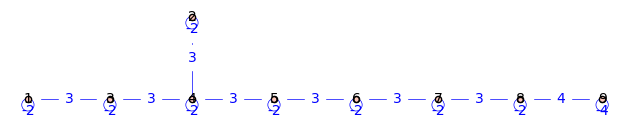

In [4]:
G991 = CoxeterDiagram()
G991.init_from_coxiter_file("/home/dzack/dissertation/Research_Files/9-9-1_1.coxiter")
G991.color_nodes([-2, -2, -2, -2, -2, -2, -2, -2, -4])
G991_positions = {
    1: (0, 0),
    2: (2, 1),
    3: (1, 0),
    4: (2, 0),
    5: (3, 0),
    6: (4, 0),
    7: (5, 0),
    8: (6, 0),
    9: (7, 0)
}
G991.set_vertex_positions(G991_positions)
G991.plot()

In [5]:
M2 = Matrix(ZZ, G991.matrix)
for i in range( G991.matrix.nrows() ):
    for j in range ( G991.matrix.ncols() ):
        if G991.matrix[i, j] == 0:
            M2[i, j] = 2
display( G991.matrix )
show( M2 )

[-2  0  3  0  0  0  0  0  0]
[ 0 -2  0  3  0  0  0  0  0]
[ 3  0 -2  3  0  0  0  0  0]
[ 0  3  3 -2  3  0  0  0  0]
[ 0  0  0  3 -2  3  0  0  0]
[ 0  0  0  0  3 -2  3  0  0]
[ 0  0  0  0  0  3 -2  3  0]
[ 0  0  0  0  0  0  3 -2  4]
[ 0  0  0  0  0  0  0  4 -4]

[-2  2  3  2  2  2  2  2  2]
[ 2 -2  2  3  2  2  2  2  2]
[ 3  2 -2  3  2  2  2  2  2]
[ 2  3  3 -2  3  2  2  2  2]
[ 2  2  2  3 -2  3  2  2  2]
[ 2  2  2  2  3 -2  3  2  2]
[ 2  2  2  2  2  3 -2  3  2]
[ 2  2  2  2  2  2  3 -2  4]
[ 2  2  2  2  2  2  2  4 -4]

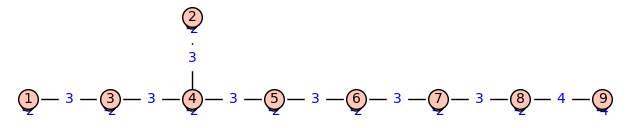

In [6]:
G = G991.graph
plot(G, edge_labels=True)

In [7]:
len( G991.subgraphs )

512

In [8]:
M = G991.matrix
M

[-2  0  3  0  0  0  0  0  0]
[ 0 -2  0  3  0  0  0  0  0]
[ 3  0 -2  3  0  0  0  0  0]
[ 0  3  3 -2  3  0  0  0  0]
[ 0  0  0  3 -2  3  0  0  0]
[ 0  0  0  0  3 -2  3  0  0]
[ 0  0  0  0  0  3 -2  3  0]
[ 0  0  0  0  0  0  3 -2  4]
[ 0  0  0  0  0  0  0  4 -4]

In [9]:
for i in range( M.nrows() ):
    for j in range( M.ncols() ):
        if i != j and M[i, j] > 0:
            M[i, j] = M[i,j] - 2

In [10]:
M = G991.subgraphs[176].weighted_adjacency_matrix()
M

[-2  0  0  0]
[ 0 -2  3  0]
[ 0  3 -2  3]
[ 0  0  3 -2]

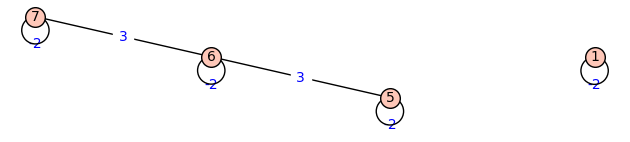

In [11]:
G991.subgraphs[176].plot(edge_labels=True)

In [12]:
M.is_positive_definite()

False

In [13]:
M.is_positive_semidefinite()

False

In [14]:
(-M).is_positive_definite()

False

In [15]:
(-M).is_positive_semidefinite()

False

In [16]:
M = Matrix(ZZ, 2, [2, 1, 1, 2])

In [17]:
M.is_positive_definite()

True

In [18]:
A2 = CoxeterDiagram()
A2.init_from_tuples([
    (1,2,1),
    (2,3,1),
    (1,3,1)
])
A2.color_nodes([-2, -2, -2])
A2.matrix

Created empty Coxeter diagram.


[-2  1  1]
[ 1 -2  1]
[ 1  1 -2]

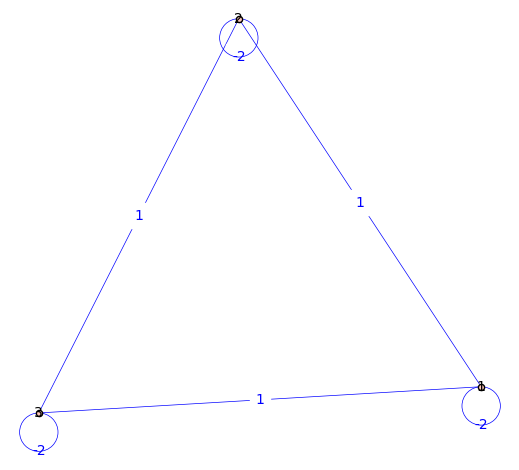

In [19]:
A2.plot()

In [20]:
A2p = CoxeterGroup(["A",3])
A2p

Finite Coxeter group over Integer Ring with Coxeter matrix:
[1 3 2]
[3 1 3]
[2 3 1]

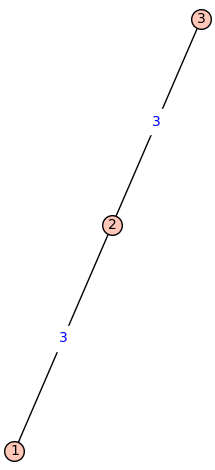

In [21]:
G = A2p.coxeter_diagram()
G.plot(edge_labels=True)

In [22]:
-2 * A2p.bilinear_form()

[-2  1  0]
[ 1 -2  1]
[ 0  1 -2]

In [23]:
G.weighted_adjacency_matrix()

[0 3 0]
[3 0 3]
[0 3 0]

In [24]:
G.coxeter_diagram().weighted_adjacency_matrix()

AttributeError: 'Graph' object has no attribute 'coxeter_diagram'

In [25]:
G = CoxeterGroup(["A",7])
G

Finite Coxeter group over Integer Ring with Coxeter matrix:
[1 3 2 2 2 2 2]
[3 1 3 2 2 2 2]
[2 3 1 3 2 2 2]
[2 2 3 1 3 2 2]
[2 2 2 3 1 3 2]
[2 2 2 2 3 1 3]
[2 2 2 2 2 3 1]

In [26]:
Gr = G.coxeter_diagram()

In [27]:
type(Gr)

<class 'sage.graphs.graph.Graph'>

In [97]:
class EllipticSubgraphs:
    
    def __init__(self, max_rank=25):
        self.max_rank = max_rank
        self.A = []
        self.B = []
        self.C = []
        self.D = []
        self.E = []
        for i in [j + 1 for j in range(self.max_rank)]:
            self.A.append( CoxeterGroup(["A",i]) )
            self.B.append( CoxeterGroup(["B",i]) )
            self.C.append( CoxeterGroup(["C",i]) )
            self.D.append( CoxeterGroup(["D",i+1]) )
        self.E.append( CoxeterGroup(["E",6]) )
        self.E.append( CoxeterGroup(["E",7]) )
        self.E.append( CoxeterGroup(["E",8]) )
        self.counts = defaultdict(lambda : 0)
        
        print("Initialized elliptic Coxeter diagrams of rank at most " + str(max_rank) )

    def iso_type(self, H):
        if H.num_verts == 0:
            return ""
        for i, a in enumerate( self.A ):
            if a.coxeter_diagram().is_isomorphic(H):
                return "A" + str(i+1)
        for i, a in enumerate( self.B ):
            if a.coxeter_diagram().is_isomorphic(H):
                return "B" + str(i+1)
        for i, a in enumerate( self.C ):
            if a.coxeter_diagram().is_isomorphic(H):
                return "C" + str(i+1)
        for i, a in enumerate( self.D ):
            if a.coxeter_diagram().is_isomorphic(H):
                return "D" + str(i+2)
        for i, a in enumerate( self.E ):
            if a.coxeter_diagram().is_isomorphic(H):
                return "E" + str(i+6)
        return "Unknown."

    def subgraph_iso_types(self, H):
        types = list( map( lambda hp: self.iso_type( H.subgraph(hp) ), H.connected_components(sort=True) ) )
        identifier_string = reduce( lambda a,b: a + "+" + b, types)
        return identifier_string

    def count_subgraph_types(self, G):
        self.counts = defaultdict(lambda : 0)
        subgraphs = []
        S = [s for s in Subsets(G.vertex_iterator()) if s.cardinality() > 0 ]
        for s in S:
            Hi = G.subgraph(list(s))
            if Hi.is_connected():
                subgraphs.append(Hi)
        for sg in subgraphs:
            id = E.subgraph_iso_types(sg)
            self.counts[id] += 1
        return dict( self.counts )
        

In [98]:
E = EllipticSubgraphs(max_rank=10)

Initialized elliptic Coxeter diagrams of rank at most 10


In [99]:
A4 = CoxeterGroup(["A",4])
A4

Finite Coxeter group over Integer Ring with Coxeter matrix:
[1 3 2 2]
[3 1 3 2]
[2 3 1 3]
[2 2 3 1]

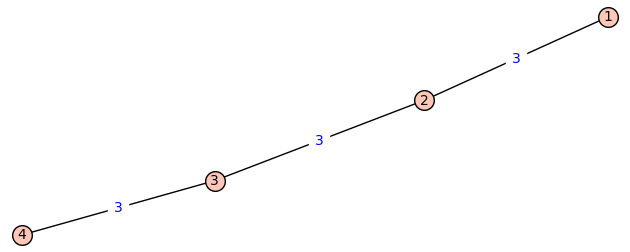

In [100]:
A5 = CoxeterGroup(["A",4])
A5.coxeter_diagram().plot(edge_labels = True)

In [101]:
G = A5.coxeter_diagram()
G.weighted_adjacency_matrix() - 2 * identity_matrix(ZZ, 4)

[-2  3  0  0]
[ 3 -2  3  0]
[ 0  3 -2  3]
[ 0  0  3 -2]

In [102]:
E.count_subgraph_types( CoxeterGroup(["E",6]).coxeter_diagram() )

{'A1': 6, 'A2': 5, 'A3': 5, 'A4': 4, 'D4': 1, 'D5': 2, 'A5': 1, 'E6': 1}

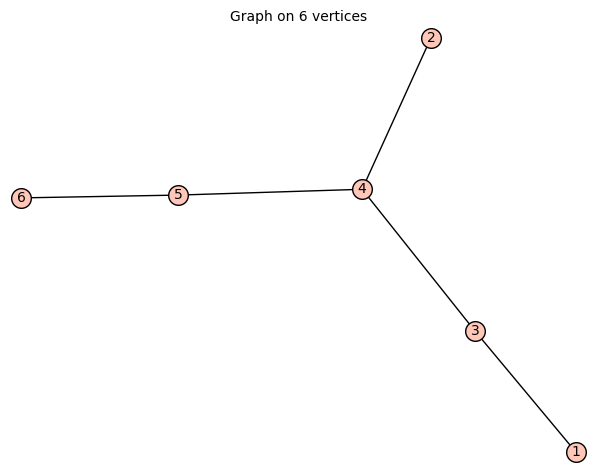

In [104]:
G = CoxeterGroup(["E",6]).coxeter_diagram()
G

In [121]:
AutG = G.automorphism_group()
AutG

Permutation Group with generators [(1,6)(3,5)]

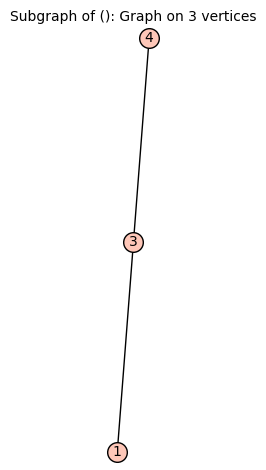

In [111]:
H = G.subgraph( [1,3,4] )
H

In [131]:
g = AutG.gen()
g

(1,6)(3,5)

In [134]:
g.cycle_tuples()

[(1, 6), (3, 5)]

A1


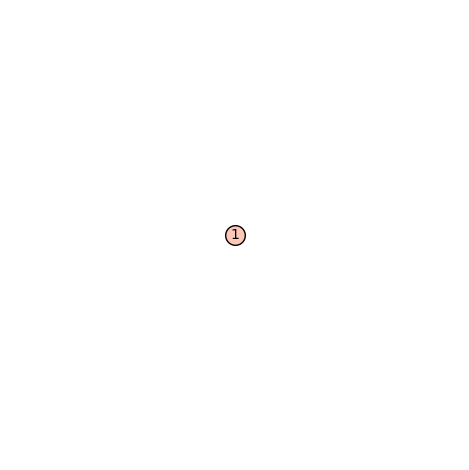

-------------------------------------------
A1


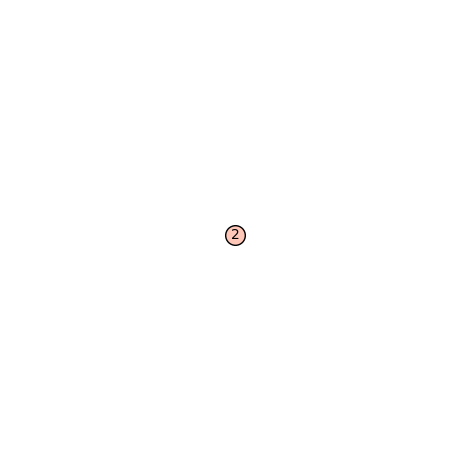

-------------------------------------------
A1


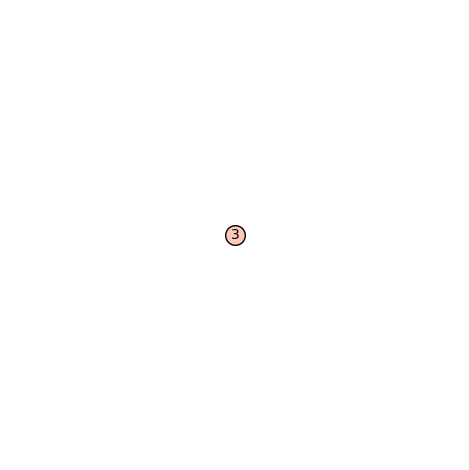

-------------------------------------------
A1


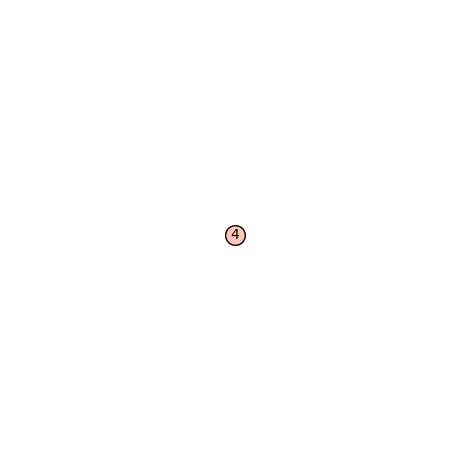

-------------------------------------------
A2


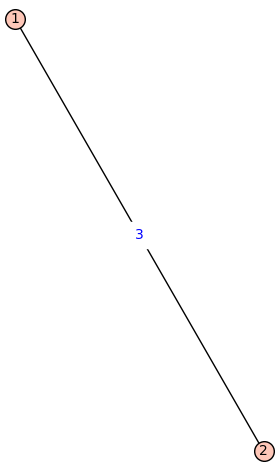

-------------------------------------------
A1+A1


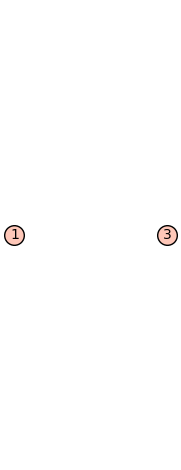

-------------------------------------------
A1+A1


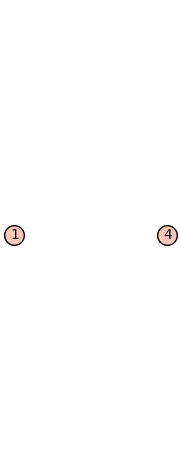

-------------------------------------------
A2


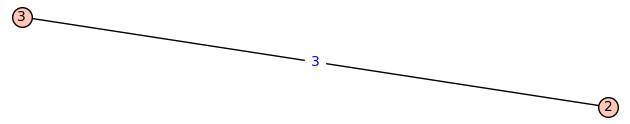

-------------------------------------------
A1+A1


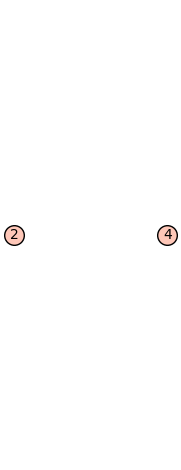

-------------------------------------------
A2


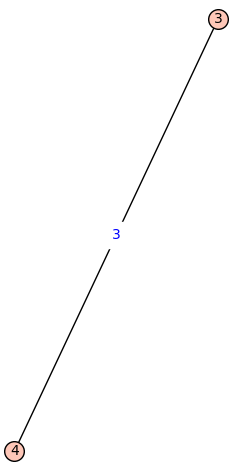

-------------------------------------------
A3


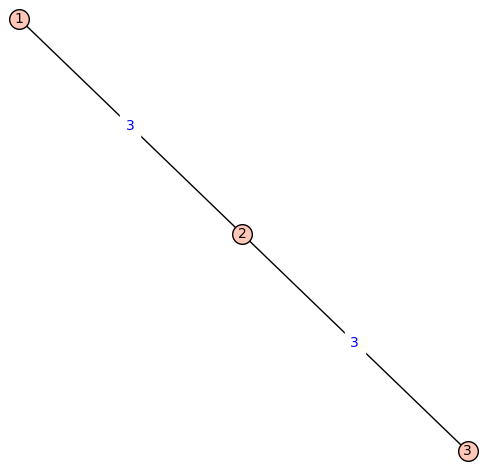

-------------------------------------------
A2+A1


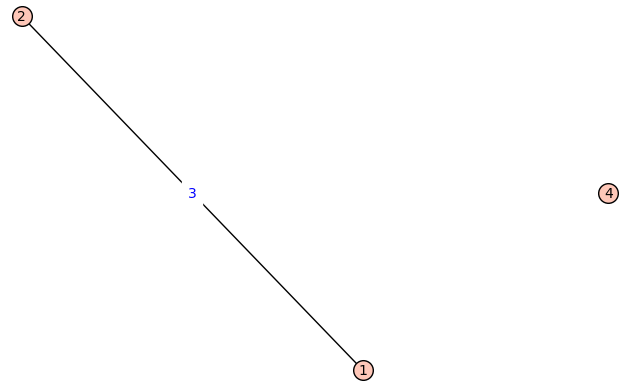

-------------------------------------------
A2+A1


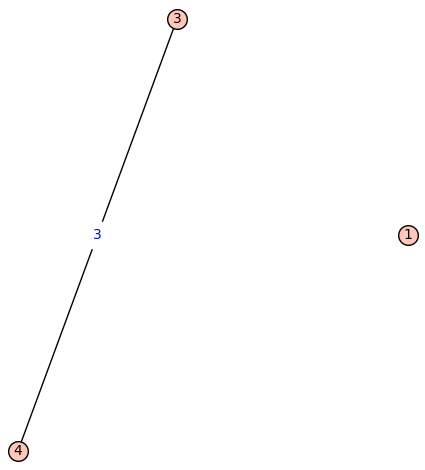

-------------------------------------------
A3


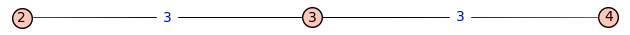

-------------------------------------------
A4


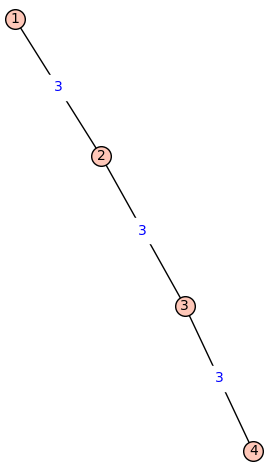

-------------------------------------------


In [36]:
for sg in subgraphs:
    id = E.subgraph_iso_types(sg)
    print(id)
    show( sg.plot(edge_labels = True) )
    print("-------------------------------------------")

In [137]:
S = SymmetricGroup(6)
g = S( [(1,6), (3,5)])
g

(1,6)(3,5)

In [152]:
a = lambda g, x: g*x
PermutationGroup(
    [g], 
    action = a,                 # needs sage.combinat
    domain = (1,3,4)
).orbits()


TypeError: unsupported operand parent(s) for *: 'Symmetric group of order 6! as a permutation group' and 'Integer Ring'

In [39]:
for hp in H.connected_components():
    Hp = H.subgraph(hp)
    print( E.iso_type(Hp) )

NameError: name 'H' is not defined

In [40]:
ls = list( map( lambda hp: E.iso_type( H.subgraph(hp) ), H.connected_components() ) )
ls

NameError: name 'H' is not defined

In [41]:
reduce( lambda a,b: a + "+" + b, ls)

NameError: name 'ls' is not defined

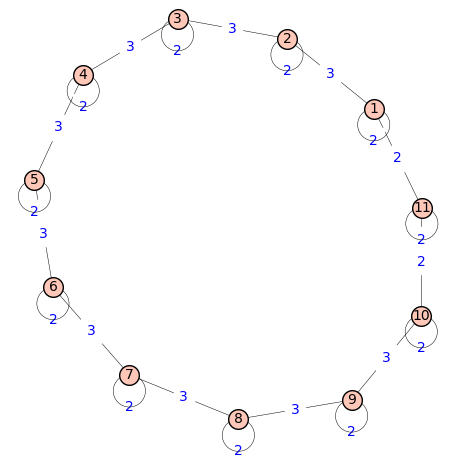

In [60]:
def build_A(n):
    G = Graph(loops=True)
    for i in range(n):
        G.add_vertex(i+1)
        G.add_edge(i+1, i+1, 2)
    for i in range(n-1):
        G.add_edge(i+1, i+2, 3)
    return G

def build_TA(n):
    G = build_A(n)
    G.add_vertex(n+1)
    G.add_edge(n+1, n+1, 2)
    G.add_edge(1, n+1, 2)
    G.add_edge(n, n+1, 2)
    return G

G = build_TA(10)
G.plot(edge_labels=True, edge_thickness=0.35)

In [43]:
n=4
G = CoxeterGraph()
for i in range(n):
    G.add_vertex(i+1)
    G.add_edge(i+1, i+1, 2)
    G.vertex_color_dict["#FFFFFF"].append(i+1)
G.set_edge_label(n, n, 4)
G.vertex_color_dict["#AAAAAA"].append(n)
for i in range(n-1):
        G.add_edge(i+1, i+2, 3)

NameError: name 'CoxeterGraph' is not defined

In [44]:
G.vertex_color_dict

AttributeError: 'Graph' object has no attribute 'vertex_color_dict'

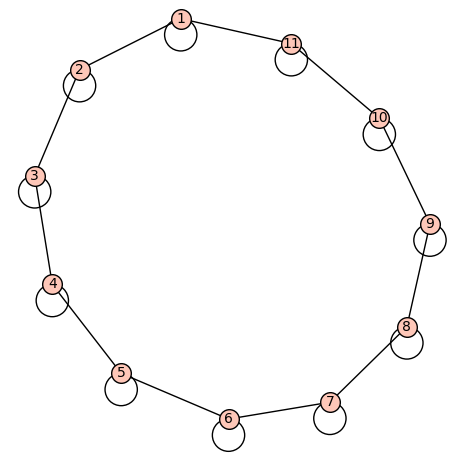

In [45]:
G.plot()

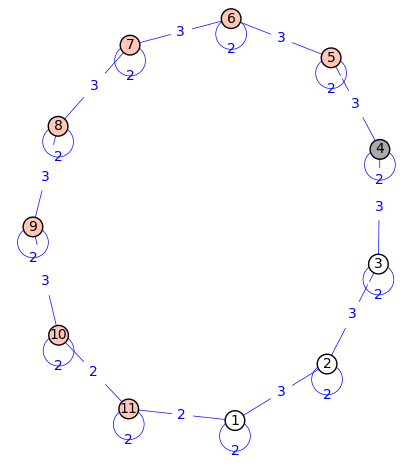

In [46]:
def plot_coxeter_diagram(G):
    d = {
        '#FFFFFF': [1,2,3], 
        '#AAAAAA': [4]
    }
    return G.plot(
            # talk = True,
            edge_labels = True,
            edge_thickness = 0.5, 
            edge_color = 'blue', 
            edge_style = 'solid', 
            vertex_size = 200,
            vertex_colors=d
        )

plot_coxeter_diagram(G)

In [47]:
class CoxeterGraph(Graph):

    
    def __init__(self, *args, **kwargs):
        self.vertex_color_dict = {
            '#FFFFFF': [], 
            '#AAAAAA': []
        }
        super(CoxeterGraph, self).__init__(*args, **kwargs)
        Graph.allow_loops(self, True)
    def plot(self):
        return Graph.plot(
            self, 
            edge_labels = True,
            edge_thickness = 0.5, 
            edge_color = 'blue', 
            edge_style = 'solid', 
            vertex_size = 200,
            vertex_colors = self.vertex_color_dict
        )
        

In [48]:
G.allow_loops(True)

In [49]:
def build_A(n):
    G = Graph(loops=True)
    for i in range(n):
        G.add_vertex(i+1)
        G.add_edge(i+1, i+1, 2)
    for i in range(n-1):
        G.add_edge(i+1, i+2, 3)
    return G

def build_TA(n):
    G = build_A(n)
    G.add_vertex(n+1)
    G.add_edge(n+1, n+1, 2)
    G.add_edge(1, n+1, 2)
    G.add_edge(n, n+1, 2)
    return G

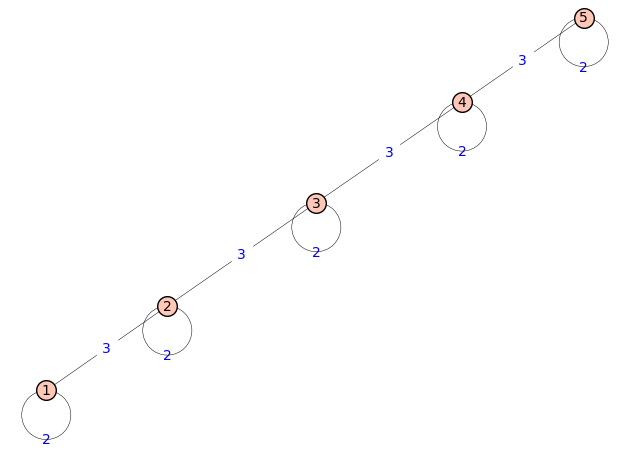

In [59]:
A3 = build_A(5)
A3.plot(edge_labels=True, edge_thickness=0.35)